<a href="https://colab.research.google.com/github/rachitt-t/AI-in-healthcare/blob/main/LAB_04_RACHIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RACHIT TAYAL        LAB04     E22CEU0118

In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/healthcare_dataset.csv")

# Show first 5 rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [25]:
# Convert datetime columns
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors="coerce")

# Forward fill without sorting
df = df.ffill()
df = df.reset_index(drop=True)
print(df.head())   # will now match the Serial No order

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [26]:
# 1. Create Length of Stay (in days)
df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

# 2. Create High Billing feature
median_billing = df["Billing Amount"].median()
df["High_Billing"] = (df["Billing Amount"] > median_billing).astype(int)

# Check results
print(df[["Date of Admission", "Discharge Date", "Length_of_Stay", "Billing Amount", "High_Billing"]].head(10))

  Date of Admission Discharge Date  Length_of_Stay  Billing Amount  \
0        2024-01-31     2024-02-02               2    18856.281306   
1        2019-08-20     2019-08-26               6    33643.327287   
2        2022-09-22     2022-10-07              15    27955.096079   
3        2020-11-18     2020-12-18              30    37909.782410   
4        2022-09-19     2022-10-09              20    14238.317814   
5        2023-12-20     2023-12-24               4    48145.110951   
6        2020-11-03     2020-11-15              12    19580.872345   
7        2021-12-28     2022-01-07              10    45820.462722   
8        2020-07-01     2020-07-14              13    50119.222792   
9        2021-05-23     2021-06-22              30    19784.631062   

   High_Billing  
0             0  
1             1  
2             1  
3             1  
4             0  
5             1  
6             0  
7             1  
8             1  
9             0  


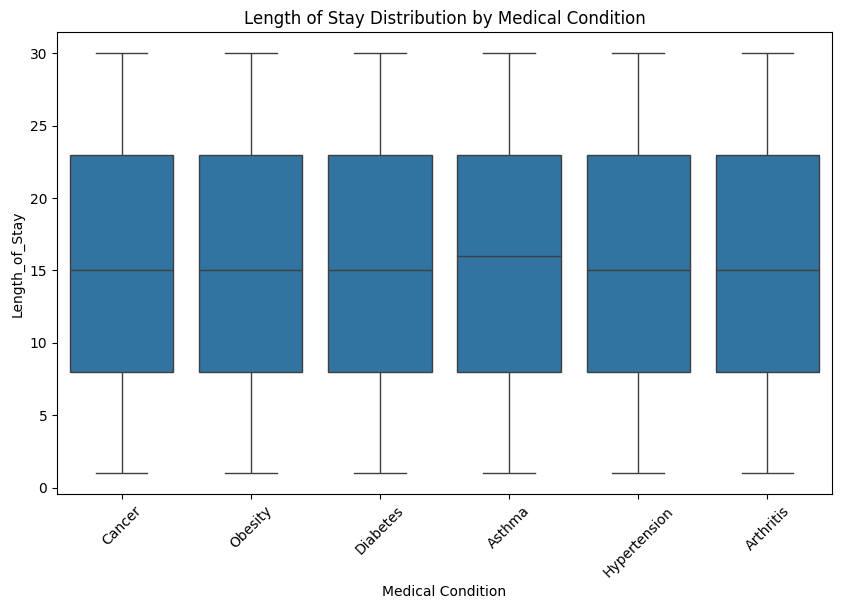

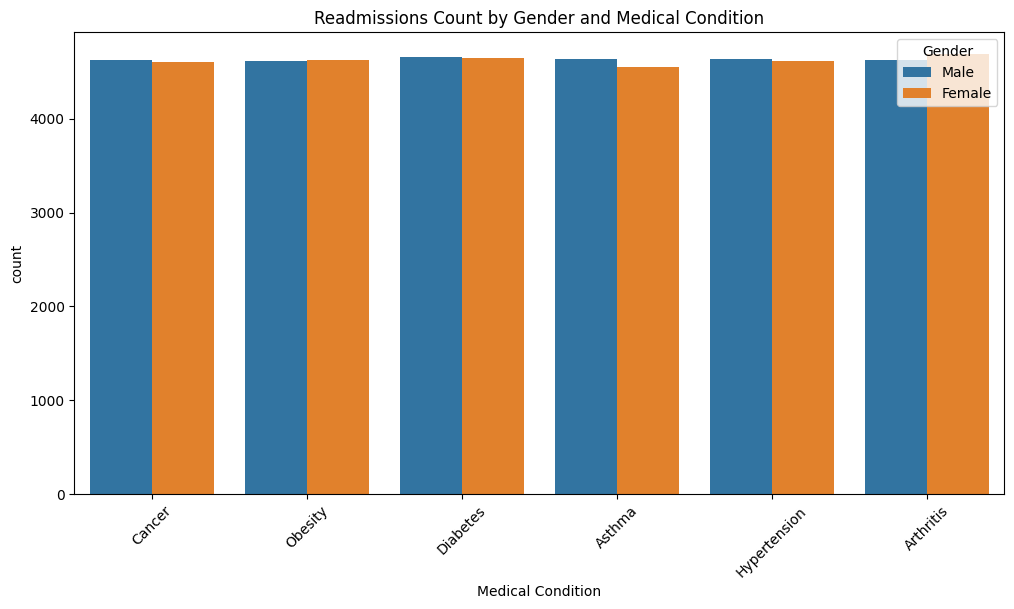

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x="Medical Condition", y="Length_of_Stay", data=df)
plt.xticks(rotation=45)   # Rotate labels for readability
plt.title("Length of Stay Distribution by Medical Condition")
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(x="Medical Condition", hue="Gender", data=df)
plt.xticks(rotation=45)
plt.title("Readmissions Count by Gender and Medical Condition")
plt.show()

In [33]:
# Create a simulated Readmission column (1 = readmitted, 0 = not)
df['Readmission Risk'] = ((df['Length_of_Stay'] > 7) | (df['Billing Amount'] > df['Billing Amount'].median())).astype(int)

In [34]:
# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Encode categorical variables (Gender, Medical Condition)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0 (for example)

le_condition = LabelEncoder()
df['Medical Condition'] = le_condition.fit_transform(df['Medical Condition'])

# Select features (X) and target (y)
X = df[['Age', 'Gender', 'Medical Condition', 'Billing Amount', 'Length_of_Stay']]
y = df['Readmission Risk']   # assuming 1 = yes, 0 = no

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Model Evaluation:
Accuracy : 0.9619
Precision: 0.9761
Recall   : 0.9810
F1-score : 0.9785

Detailed Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1281
           1       0.98      0.98      0.98      9819

    accuracy                           0.96     11100
   macro avg       0.91      0.90      0.91     11100
weighted avg       0.96      0.96      0.96     11100



             Feature  Coefficient  Importance
4     Length_of_Stay     0.894888    0.894888
1             Gender     0.051021    0.051021
2  Medical Condition    -0.007001    0.007001
0                Age     0.000542    0.000542
3     Billing Amount     0.000254    0.000254


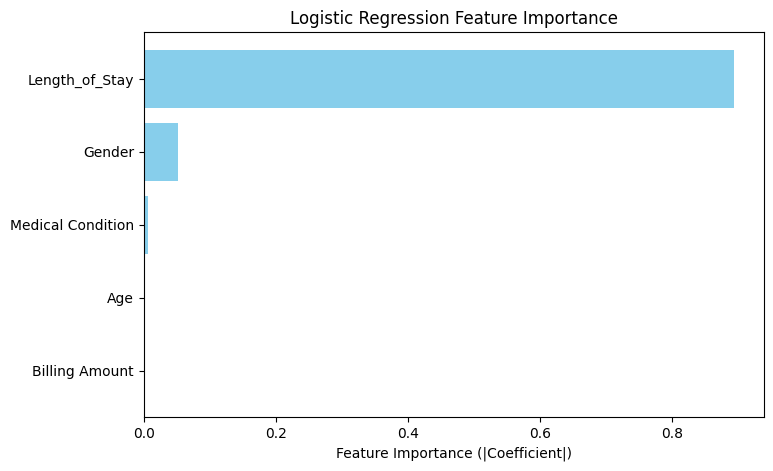

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names (X columns)
feature_names = X.columns

# Get coefficients from logistic regression
coefficients = model.coef_[0]

# Take absolute value for importance ranking
importance = np.abs(coefficients)

# Create a dataframe for sorting
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color="skyblue")
plt.xlabel("Feature Importance (|Coefficient|)")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()  # Highest on top
plt.show()